In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier

In [2]:
iowatrain = pd.read_csv('./datasets/train.csv')


In [3]:
iowatrain.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
iowatrain.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [5]:
iowatrain.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [6]:
iowatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [7]:
iowatrain.drop('Id', axis = 1, inplace=True)

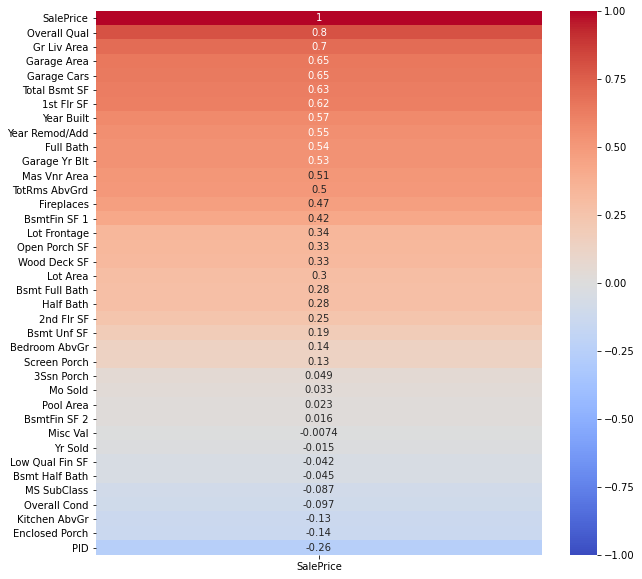

In [8]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

sns.heatmap(iowatrain.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False),
            annot=True, vmin=-1, vmax=1,
           cmap='coolwarm', ax=ax);


# https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
# This is a link that showed me how to get my heatmap bigger!
# Import to note that the heat map only shows corrrelations with numerical columns. 

# I"MA HAVE TO GET DUMB

In [9]:
# iowatrain.columns = [x.lower() for x in iowatrain.columns]
# iowatrain.columns = [x.strip().replace(' ', '_') for x in iowatrain.columns]

In [10]:
# dummified_df= pd.DataFrame()
# iowatrain

In [11]:
# count = 0
# for i in iowatrain.columns:
#     if iowatrain[i].dtype == 'object': #There are 42 rows of objects. I'm going to DUMBIFY THEM ALLL MUHAHHAHA! 
#         count += 1
# count
        

In [12]:
# dummified_dflist = [pd.get_dummies(iowatrain[i]) for i in iowatrain.columns if iowatrain[i].dtype == 'object' ]

In [13]:
# dummy_df = pd.concat(dummified_dflist,axis = 1)

In [14]:
# dummy_df.shape

In [15]:
# dummy_df.columns

In [16]:
# what do we want to do here???
#       we want to assign numerical values on these columns. starting at 0 or 1??? 
#       does it matter??? some of these columns have None or NA...... 
#       should i make an effort to call those 0s? 
# Also how do I know that they will be in order ,,, seeing that presently they are strings and ...
#        they have diferent strings to represent their scales/ OHHHH FUNYONS!  

In [17]:
iowatrain["Bsmt Cond"].fillna('NA', inplace=True)
iowatrain['Bsmt Qual'].fillna('NA', inplace=True)
iowatrain['Bsmt Exposure'].fillna('NA', inplace=True)
iowatrain['BsmtFin Type 1'].fillna('NA', inplace=True)
iowatrain['BsmtFin Type 2'].fillna('NA', inplace=True)

iowatrain['Fireplace Qu'].fillna('NA', inplace=True)
iowatrain['Garage Finish'].fillna('NA', inplace=True)
iowatrain['Garage Qual'].fillna('NA', inplace=True)
iowatrain['Garage Cond'].fillna('NA', inplace=True)
iowatrain['Pool QC'].fillna('NA', inplace=True)
iowatrain['Fence'].fillna('NA', inplace=True)

In [18]:
# This is a reeeeeeeeeeeeallllly big data set. Let's rethink this.
# How about we take all the ordinal variables and make them ranked. 
ordinalcols = [ 'Lot Shape', 'Utilities' , 'Land Slope', 'Exter Qual',
               'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2' ,
               'Heating QC' ,'Electrical'  , 'Kitchen Qual' , "Functional", 'Fireplace Qu' , 'Garage Finish', 
              'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence'   ]
# ordinal_df = iowatrain[ordinalcols]

# ordinal_df.columns = [x.lower() for x in ordinal_df.columns]
# ordinal_df.columns = [x.strip().replace(' ', '_') for x in ordinal_df.columns]
iowatrain.columns = [x.lower() for x in iowatrain.columns]
iowatrain.columns = [x.strip().replace(' ', '_') for x in iowatrain.columns]
ordinalcols = [x.lower() for x in ordinalcols]
ordinalcols = [x.strip().replace(' ', '_') for x in ordinalcols]

In [19]:
iowatrain['bsmt_qual'].unique()

array(['TA', 'Gd', 'Fa', 'NA', 'Ex', 'Po'], dtype=object)

In [20]:
# # I'm organizing these from good to bad, as best as I know. I'm not a realitor but hey -_O_-
# replist01 = ['Reg', 'IR1', 'IR2', 'IR3'] #LotShape
# replist02 = ['AllPub', 'NoSeWa', 'NoSewr'] #Utilities
# replist03 = ['Gtl',  'Mod', 'Sev'] #LandSlope
# replist04 = ['NA', 'Ex','Gd', 'TA', 'Fa', 'Po'] #ExtQual, ExtrCond, BsmtQual, BsmtCond,,HeatingQC, KitchenQual:
#                                                #FireplaceQu, GarageQual, GarageCond, PoolQC,  
# replist05 = ['Gd', 'Av', 'Mn', 'No', 'NA'] #Bsmt Exposure
# replist06 = ['NA', 'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf'] #BsmtFinType1&2, 
# replist07 = ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'] #Electrical
# replist08 = ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'] #Functional(Home), 
# replist09 = ['NA', 'Fin', 'RFn', 'Unf'] # GarageFinish, 
# replist10 = ['Y', 'P', 'N'] #Paved Drive
# replist11 = ['NA', 'GdPrv', 'MnPrv', 'GdWo', 'MnWw'] #Fence

In [21]:
iowatrain.replace({
            'lot_shape': {'Reg':1 , 'IR1':2 , 'IR2':3 , 'IR3':4 },
            'utilities': {'AllPub':1, 'NoSeWa':2, 'NoSewr':3 },
            'land_slope': {'Gtl':1,  'Mod':2, 'Sev':3},
            'exter_qual': {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'exter_cond': {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'bsmt_qual':  {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'bsmt_cond':  {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'bsmt_exposure': {'NA': 0, 'Gd':1 , 'Av':2, 'Mn':3, 'No':4},
            'bsmtfin_type_1': {'NA':0, 'GLQ':1, 'ALQ':2, 'BLQ':3,
                                      'Rec':4, 'LwQ':5, 'Unf':6},
            'bsmtfin_type_2': {'NA':0, 'GLQ':1, 'ALQ':2, 'BLQ':3,
                                      'Rec':4, 'LwQ':5, 'Unf':6},
            'heating_qc': {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'electrical': {'SBrkr':1, 'FuseA':2, 'FuseF':3, 'FuseP':4, 'Mix':5},
            'kitchen_qual':  {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'functional':{'Typ':1, 'Min1':2, 'Min2':3, 'Mod':4, 
                                   'Maj1':5, 'Maj2':6, 'Sev':7, 'Sal':8 },
            'fireplace_qu':  {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'garage_finish': {'NA':0, 'Fin':1, 'RFn':2, 'Unf':3},
            'garage_qual':   {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'garage_cond':    {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'paved_drive':   {'Y':1, 'P':2, 'N':3},
            'pool_qc':   {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'fence':  {'NA':0, 'GdPrv':1, 'MnPrv':2, 'GdWo':3, 'MnWw':4}
            }, inplace=True)

In [22]:
iowatrain['lot_shape'].unique()        


array([2, 1, 3, 4], dtype=int64)

In [23]:
othercols = []                       # These are the NON-ORDINAL columns. 
for col in iowatrain.columns:
    if col not in ordinalcols:
        othercols.append(col)

In [24]:
iowatrain['alley'].fillna('NA', inplace=True)
iowatrain['mas_vnr_type'].fillna('NA', inplace=True)
iowatrain['garage_type'].fillna('NA', inplace=True)
# HERE THERE IS ONLY ONE NULL VALUE FOR THESE, SO I'M USING THE MEAN SO NOT TO SQEW
# THE DATA.
iowatrain['garage_yr_blt'].fillna(iowatrain['garage_yr_blt'].mean(), inplace=True)
iowatrain['bsmtfin_sf_1'].fillna(iowatrain['bsmtfin_sf_1'].mean(), inplace=True)
iowatrain['bsmtfin_sf_2'].fillna(iowatrain['bsmtfin_sf_2'].mean(), inplace=True)
iowatrain['mas_vnr_area'].fillna(iowatrain['mas_vnr_area'].mean(), inplace=True)
iowatrain['bsmt_unf_sf'].fillna(iowatrain['bsmt_unf_sf'].mean(), inplace=True)
iowatrain['total_bsmt_sf'].fillna(iowatrain['total_bsmt_sf'].mean(), inplace=True)
iowatrain['bsmt_full_bath'].fillna(iowatrain['bsmt_full_bath'].mean(), inplace=True)
iowatrain['bsmt_half_bath'].fillna(iowatrain['bsmt_half_bath'].mean(), inplace=True)
iowatrain['garage_cars'].fillna(iowatrain['garage_cars'].mean(), inplace=True)
iowatrain['garage_area'].fillna(iowatrain['garage_area'].mean(), inplace=True)


In [25]:
iowatrain[othercols].isnull().sum()

pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley                 0
land_contour          0
lot_config            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type          0
mas_vnr_area          0
foundation            0
bsmtfin_sf_1          0
bsmtfin_sf_2          0
bsmt_unf_sf           0
total_bsmt_sf         0
heating               0
central_air           0
1st_flr_sf            0
2nd_flr_sf            0
low_qual_fin_sf       0
gr_liv_area           0
bsmt_full_bath        0
bsmt_half_bath        0
full_bath             0
half_bath             0
bedroom_abvgr         0
kitchen_abvgr         0
totrms_abvgrd   

In [26]:
iowatrain['garage_type'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'NA', '2Types',
       'CarPort'], dtype=object)

In [27]:
iowatrain['ms_zoning'].dtype

dtype('O')

In [28]:
numericalcols = [col for col in iowatrain.columns if iowatrain[col].dtype != 'O']
numericalcols

['pid',
 'ms_subclass',
 'lot_frontage',
 'lot_area',
 'lot_shape',
 'utilities',
 'land_slope',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'mas_vnr_area',
 'exter_qual',
 'exter_cond',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'heating_qc',
 'electrical',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'kitchen_qual',
 'totrms_abvgrd',
 'functional',
 'fireplaces',
 'fireplace_qu',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_area',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'pool_area',
 'pool_qc',
 'fence',
 'misc_val',
 'mo_sold',
 'yr_sold',
 'saleprice']

In [29]:
iowatrain[numericalcols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 59 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              2051 non-null   int64  
 1   ms_subclass      2051 non-null   int64  
 2   lot_frontage     1721 non-null   float64
 3   lot_area         2051 non-null   int64  
 4   lot_shape        2051 non-null   int64  
 5   utilities        2051 non-null   int64  
 6   land_slope       2051 non-null   int64  
 7   overall_qual     2051 non-null   int64  
 8   overall_cond     2051 non-null   int64  
 9   year_built       2051 non-null   int64  
 10  year_remod/add   2051 non-null   int64  
 11  mas_vnr_area     2051 non-null   float64
 12  exter_qual       2051 non-null   int64  
 13  exter_cond       2051 non-null   int64  
 14  bsmt_qual        2051 non-null   int64  
 15  bsmt_cond        2051 non-null   int64  
 16  bsmt_exposure    2051 non-null   int64  
 17  bsmtfin_type_1

In [30]:
iowatrain.columns

Index(['pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish'

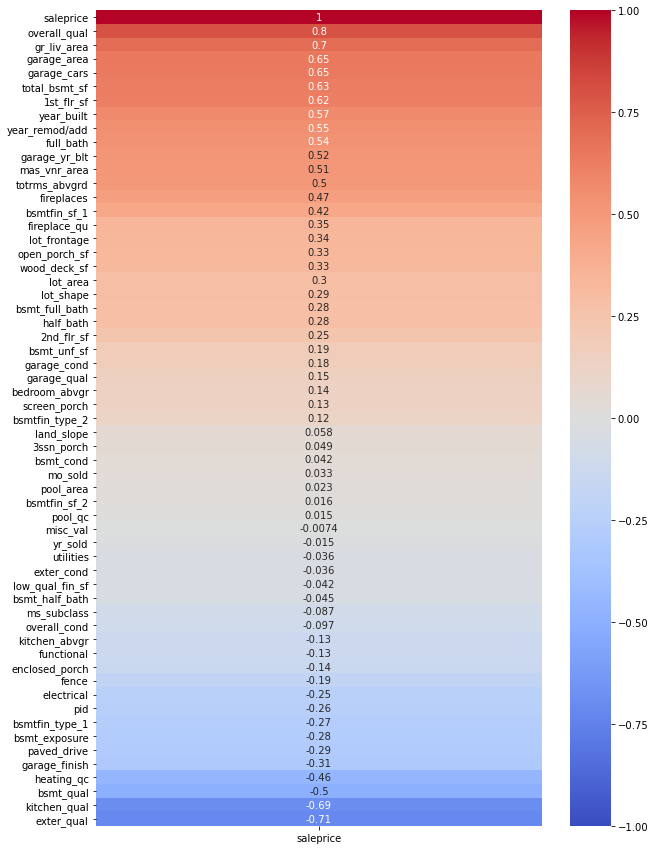

In [31]:
fig, ax = plt.subplots(figsize=(10,15))         # Sample figsize in inches

sns.heatmap(iowatrain.corr()[['saleprice']].sort_values(by='saleprice', ascending=False),
            annot=True, vmin=-1, vmax=1,
           cmap='coolwarm', ax=ax);

In [32]:
numericalcols = [col for col in iowatrain.columns if iowatrain[col].dtype != 'O']


In [89]:
# features = 
X = iowatrain[numericalcols].drop(['saleprice', 'lot_frontage' , 'mas_vnr_area' , 'garage_yr_blt', 'pid'], axis =1)
y = iowatrain['saleprice']
X.shape

(2051, 54)

In [72]:
lr = LinearRegression()
sc = StandardScaler()
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False )
X_overfit = poly.fit_transform(X)

In [73]:
X_overfit.shape

(2051, 1539)

In [59]:
X_train, X_test, y_train, y_test = train_test_split( X_overfit, 
                                                    y, 
                                                    train_size=0.8,
                                                    random_state=42)

In [79]:
Z_train = sc.fit_transform(X_train)
Z_test = sc.fit_transform(X_test)

In [61]:
# Instantiate.
ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(Z_train, y_train)

# Evaluate model using R2.
print(ridge_model.score(Z_train, y_train))
print(ridge_model.score(Z_test, y_test))

0.9701448882456059
0.8577760013753465


In [83]:
print(Z_train.shape)
print(Z_test.shape)

(1640, 1539)
(411, 1539)


In [81]:
# lr.fit(Z_train, y_train)
# lr.score(Z_test, y_test)
# lr.score(Z_train, y_train)

In [42]:
#################################################################################################################################

In [43]:
iowatest = pd.read_csv('./datasets/test.csv')

In [44]:
iowatest.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    160
               ... 
Misc Feature    837
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
Length: 80, dtype: int64

In [45]:
iowatest["Bsmt Cond"].fillna('NA', inplace=True)
iowatest['Bsmt Qual'].fillna('NA', inplace=True)
iowatest['Bsmt Exposure'].fillna('NA', inplace=True)
iowatest['BsmtFin Type 1'].fillna('NA', inplace=True)
iowatest['BsmtFin Type 2'].fillna('NA', inplace=True)
iowatest['Electrical'].fillna(0, inplace=True)
iowatest['Fireplace Qu'].fillna('NA', inplace=True)
iowatest['Garage Finish'].fillna('NA', inplace=True)
iowatest['Garage Qual'].fillna('NA', inplace=True)
iowatest['Garage Cond'].fillna('NA', inplace=True)
iowatest['Pool QC'].fillna('NA', inplace=True)
iowatest['Fence'].fillna('NA', inplace=True)

In [46]:
iowatest.columns = [x.lower() for x in iowatest.columns]
iowatest.columns = [x.strip().replace(' ', '_') for x in iowatest.columns]

In [47]:
iowatest.replace({
            'lot_shape': {'Reg':1 , 'IR1':2 , 'IR2':3 , 'IR3':4 },
            'utilities': {'AllPub':1, 'NoSeWa':2, 'NoSewr':3 },
            'land_slope': {'Gtl':1,  'Mod':2, 'Sev':3},
            'exter_qual': {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'exter_cond': {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'bsmt_qual':  {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'bsmt_cond':  {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'bsmt_exposure': {'NA': 0, 'Gd':1 , 'Av':2, 'Mn':3, 'No':4},
            'bsmtfin_type_1': {'NA':0, 'GLQ':1, 'ALQ':2, 'BLQ':3,
                                      'Rec':4, 'LwQ':5, 'Unf':6},
            'bsmtfin_type_2': {'NA':0, 'GLQ':1, 'ALQ':2, 'BLQ':3,
                                      'Rec':4, 'LwQ':5, 'Unf':6},
            'heating_qc': {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'electrical': {'SBrkr':1, 'FuseA':2, 'FuseF':3, 'FuseP':4, 'Mix':5},
            'kitchen_qual':  {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'functional':{'Typ':1, 'Min1':2, 'Min2':3, 'Mod':4, 
                                   'Maj1':5, 'Maj2':6, 'Sev':7, 'Sal':8 },
            'fireplace_qu':  {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'garage_finish': {'NA':0, 'Fin':1, 'RFn':2, 'Unf':3},
            'garage_qual':   {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'garage_cond':    {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'paved_drive':   {'Y':1, 'P':2, 'N':3},
            'pool_qc':   {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'fence':  {'NA':0, 'GdPrv':1, 'MnPrv':2, 'GdWo':3, 'MnWw':4}
            }, inplace=True)

In [50]:
numericalcols2 = [col for col in iowatest.columns if iowatest[col].dtype != 'O']
numericalcols2
# numericalcols2.remove('lot_frontage')
# numericalcols2.remove('mas_vnr_area')
# numericalcols2.remove('garage_yr_blt')
# numericalcols2.remove('pid')
numericalcols2.remove('id')
# iowatrain[numericalcols2]

In [99]:
XX = iowatest[numericalcols2].drop(['lot_frontage' , 'mas_vnr_area' , 'garage_yr_blt', 'pid'], axis =1)

# iowatest[numericalcols2].info()
# We have extra null values in a few columns ( lot_frontage , mas_vnr_area , garage_yr_blt )
# We will have to remove these values from the test before we fit it I think. 
# Might as well take 'pid' out too.
XX_overfit = poly.fit_transform(XX)

In [100]:
# XX = iowatest[numericalcols2]
# XX.isnull().sum()
XX_test = sc.fit_transform(XX_overfit)
# ridge_model.predict()
XX_test.shape

(878, 1539)

In [106]:
ridge_model.predict(XX_test);

In [102]:
iowatest['saleprice'] = ridge_model.predict(XX_test)

In [103]:
submission = iowatest[['id', 'saleprice']].copy()

In [104]:
submission

,id,saleprice
0,2658,127530.333640
1,2718,204522.271132
2,2414,204960.997972
3,1989,92164.419303
4,625,174649.779128
...,...,...
873,1662,194857.145886
874,1234,198866.562498
875,1373,143875.647005
876,1672,131984.873175


In [105]:
submission.to_csv('./datasets/submission_04.csv', index=False)